# 十分钟强化学习第二讲：策略迭代

## 继续思考冰湖问题

![Alt text](frozen_lake.gif)

In [2]:
import random
import numpy as np

In [3]:
class FrozenLake:

    def __init__(self):
        self.reset()
        self.set_tran()

    def reset(self):
        self.position = 0
        self.set_map()
        return self.position

    def set_map(self):
        self.map = list(range(16))
        self.map[self.position] = "*"

    # 0: left, 1: down, 2:right, 3:up
    def set_tran(self):
        self.transition = {
            0: {
                0: [(0.6666666666666666, 0, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False)
                ],
                1: [(0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False)
                ],
                2: [(0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 0, 0.0, False)
                ],
                3: [(0.3333333333333333, 1, 0.0, False),
                    (0.6666666666666666, 0, 0.0, False)
                ]
            },
            1: {
                0: [(0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True)
                ],
                1: [(0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 2, 0.0, False)
                ],
                2: [(0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False)
                ],
                3: [(0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 0, 0.0, False)
                ]
            },
            2: {
                0: [(0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 6, 0.0, False)
                ],
                1: [(0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 6, 0.0, False),
                    (0.3333333333333333, 3, 0.0, False)
                ],
                2: [(0.3333333333333333, 6, 0.0, False),
                    (0.3333333333333333, 3, 0.0, False),
                    (0.3333333333333333, 2, 0.0, False)
                ],
                3: [(0.3333333333333333, 3, 0.0, False),
                    (0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False)
                ]
            },
            3: {
                0: [(0.3333333333333333, 3, 0.0, False),
                    (0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 7, 0.0, True)
                ],
                1: [(0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 7, 0.0, True),
                    (0.3333333333333333, 3, 0.0, False)
                ],
                2: [(0.3333333333333333, 7, 0.0, True),
                    (0.6666666666666666, 3, 0.0, False)
                ],
                3: [(0.6666666666666666, 3, 0.0, False),
                    (0.3333333333333333, 2, 0.0, False)
                ]
            },
            4: {
                0: [(0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 8, 0.0, False)
                ],
                1: [(0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True)
                ],
                2: [(0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 0, 0.0, False)
                ],
                3: [(0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False)
                ]
            },
            5: {
                0: [(1.0, 5, 0, True)],
                1: [(1.0, 5, 0, True)],
                2: [(1.0, 5, 0, True)],
                3: [(1.0, 5, 0, True)]
            },
            6: {
                0: [(0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 10, 0.0, False)
                ],
                1: [(0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 7, 0.0, True)
                ],
                2: [(0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 7, 0.0, True),
                    (0.3333333333333333, 2, 0.0, False)
                ],
                3: [(0.3333333333333333, 7, 0.0, True),
                    (0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True)
                ]
            },
            7: {
                0: [(1.0, 7, 0, True)],
                1: [(1.0, 7, 0, True)],
                2: [(1.0, 7, 0, True)],
                3: [(1.0, 7, 0, True)]
            },
            8: {
                0: [(0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 12, 0.0, True)
                ],
                1: [(0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 12, 0.0, True),
                    (0.3333333333333333, 9, 0.0, False)
                ],
                2: [(0.3333333333333333, 12, 0.0, True),
                    (0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False)
                ],
                3: [(0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 8, 0.0, False)
                ]
            },
            9: {
                0: [(0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 13, 0.0, False)
                ],
                1: [(0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 10, 0.0, False)
                ],
                2: [(0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True)
                ],
                3: [(0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 8, 0.0, False)
                ]
            },
            10: {
                0: [(0.3333333333333333, 6, 0.0, False),
                    (0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False)
                ],
                1: [(0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 11, 0.0, True)
                ],
                2: [(0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 11, 0.0, True),
                    (0.3333333333333333, 6, 0.0, False)
                ],
                3: [(0.3333333333333333, 11, 0.0, True),
                    (0.3333333333333333, 6, 0.0, False),
                    (0.3333333333333333, 9, 0.0, False)
                ]
            },
            11: {
                0: [(1.0, 11, 0, True)],
                1: [(1.0, 11, 0, True)],
                2: [(1.0, 11, 0, True)],
                3: [(1.0, 11, 0, True)]
            },
            12: {
                0: [(1.0, 12, 0, True)],
                1: [(1.0, 12, 0, True)],
                2: [(1.0, 12, 0, True)],
                3: [(1.0, 12, 0, True)]
            },
            13: {
                0: [(0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 12, 0.0, True),
                    (0.3333333333333333, 13, 0.0, False)
                ],
                1: [(0.3333333333333333, 12, 0.0, True),
                    (0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False)
                ],
                2: [(0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 9, 0.0, False)
                ],
                3: [(0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 12, 0.0, True)
                ]
            },
            14: {
                0: [(0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False)
                ],
                1: [(0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 15, 1.0, True)
                ],
                2: [(0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 15, 1.0, True),
                    (0.3333333333333333, 10, 0.0, False)
                ],
                3: [(0.3333333333333333, 15, 1.0, True),
                    (0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 13, 0.0, False)
                ]
            },
            15: {
                0: [(1.0, 15, 0, True)],
                1: [(1.0, 15, 0, True)],
                2: [(1.0, 15, 0, True)],
                3: [(1.0, 15, 0, True)]
            }
        }

    def show(self):
        print(f"state: {self.position}")
        self.set_map()
        for i, s in enumerate(self.map):
            print("| ", end="")
            if s == "*":
                print(s, "".rjust(4), end=" ")
            else:
                print(str(s).zfill(2), "".rjust(3), end=" ")
            if (i + 1) % 4 == 0: print("|")


    def step(self,action):
        node = self.transition[self.position][action]
        probs,states,rewards,dones = zip(*node)
        choice = random.choices(population=states,weights=probs,k=1)[0]
        i = states.index(choice)
        self.position = states[i]
        return states[i], rewards[i], dones[i]

In [4]:
env = FrozenLake()

In [5]:
class Random_Agent:
    def __init__(self):
        self.policy_dict = {k:v for k in range(16) for v in random.choices(population=range(4),k=16)}
    
    def action(self, state):
        return self.policy_dict[state]

In [6]:
agent = Random_Agent()

显示策略方向的辅助函数

In [7]:
def print_policy(pi, n_cols=4):
    print('Policy:')
    arrs = {k:v for k,v in enumerate(('<', 'v', '>', '^'))}
    nS = 16
    for s in range(nS):
        a = pi(s)
        print("| ", end="")
        if s in [5,7,11,12,15]:
            print("".rjust(9), end=" ")
        else:
            print(str(s).zfill(2), arrs[a].rjust(6), end=" ")
        if (s + 1) % n_cols == 0: print("|")

In [8]:
print_policy(agent.action)

Policy:
| 00      > | 01      > | 02      v | 03      ^ |
| 04      ^ |           | 06      < |           |
| 08      ^ | 09      < | 10      ^ |           |
|           | 13      < | 14      ^ |           |


In [9]:
def test_game(env, pi, n_episodes=100, max_steps=100):
    results = []
    for _ in range(n_episodes):
        state= env.reset()
        Done = False
        steps = 0
        while not Done and steps < max_steps:
            action = pi(state)
            state, reward, Done = env.step(action)
            steps += 1
        results.append(reward>0)
    return np.sum(results)/len(results)

In [10]:
test_game(env, agent.action)

0.0

## 尝试一种人肉策略

In [11]:
class Human_Agent:
    def __init__(self):
        LEFT, DOWN, RIGHT, UP = range(4)
        self.policy_dict = {
        0:RIGHT, 1:RIGHT, 2:DOWN, 3:LEFT,
        4:DOWN, 5:LEFT, 6:DOWN, 7:LEFT,
        8:RIGHT, 9:RIGHT, 10:DOWN, 11:LEFT,
        12:LEFT, 13:RIGHT, 14:RIGHT, 15:LEFT
        }
    
    def action(self, state):
        return self.policy_dict[state]

In [12]:
agent = Human_Agent()

In [13]:
print_policy(agent.action)

Policy:
| 00      > | 01      > | 02      v | 03      < |
| 04      v |           | 06      v |           |
| 08      > | 09      > | 10      v |           |
|           | 13      > | 14      > |           |


In [16]:
test_game(env, agent.action)

0.03

为什么这个看起来“很好”的人肉策略也不大行？

## 如何找到最优策略 optimal policy.

- 需要有一种评估方法来评估policy
- 需要有一种改进方法来调整policy

来了解几个概念

- Return
- Expect Return
- State Value Function
- Action Value Function
- Action-advantage Function

In [17]:
def game_return(env, pi):
    output = []
    for _ in range(10):
        result = []
        state= env.reset()
        Done = False
        while not Done:
            action = pi(state)
            state, reward, Done = env.step(action)
            result.append(reward)
        output.append(result)
    return output

In [18]:
game_return(env, agent.action)

[[0.0, 0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

### Return是一条行动轨迹上得到的回报之和

Return = sum(reward)

Return = sum(reward * discount)

在随机环境中，可以模拟成千上万次轨迹，计算Return的期望值，用这个值来评估策略的好坏

In [19]:
def mean_return(env, pi, state0, n_episodes=100, max_steps=100):
    results = []
    for _ in range(n_episodes):
        env.position = state = state0
        Done = False
        steps = 0
        results.append(0.0)
        while not Done and steps < max_steps:
            action = pi(state)
            state, reward, Done = env.step(action)
            results[-1] += reward
            steps += 1
    return np.mean(results)

In [20]:
mean_return(env, agent.action, state0 = 0,n_episodes=10000)

0.0369

In [21]:
mean_return(env, agent.action, state0 = 10,n_episodes=10000)

0.3006

In [22]:
mean_return(env, agent.action, state0 = 14,n_episodes=10000)

0.6545

### State Value Function:  V(s)

给定某个环境和某种策略，输入初始状态，输出return的期望值，mean_return是通过模拟方式计算的近似值V(s)。通过计算V(S0)来评估policy。

Bellman公式：当前状态和下一状态的Value函数存在一种递归关系，类似于今年和明年的资产价格

V(s) = Prob * (Reward + discount* V(s'))


```
V(14) = Prob_15 * (reward + discount * V(15)) + 
        Prob_10 * (reward + discount * V(10)) + 
        Prob_14 * (reward + discount * V(14))
```

- 思考一下为什么这里没有V(13)

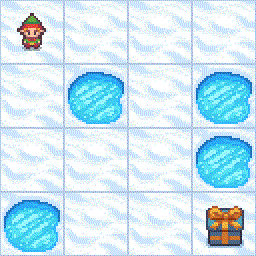

- 模拟方法可以用来计算V(s)
- 假如agent知道了转换概率，也就能通过迭代来更准确的计算V(s)
- 当然这是一种“作弊”的方式

In [23]:
def policy_evaluation(pi, P, gamma=1.0, theta=1e-10):
    prev_V = np.zeros(len(P), dtype=np.float64)
    while True:
        V = np.zeros(len(P), dtype=np.float64)
        for s in range(len(P)):
            for prob, next_state, reward, done in P[s][pi(s)]:
                V[s] += prob * (reward + gamma * prev_V[next_state] * (not done))
        if np.max(np.abs(prev_V - V)) < theta:
            break
        prev_V = V.copy()
    return V

In [24]:
Value = policy_evaluation(agent.action, env.transition)
Value.reshape(4,4)

array([[0.0375, 0.025 , 0.05  , 0.025 ],
       [0.05  , 0.    , 0.1   , 0.    ],
       [0.1   , 0.25  , 0.3   , 0.    ],
       [0.    , 0.45  , 0.65  , 0.    ]])

- 你可以验证一下V(14)的结果和其它状态价值的关系

### Action-value function：Q(S,a)

给定某个环境和某种策略，输入某个状态和某种动作，输出return的期望值

Q函数和V函数之间存在一种递归关系

Q(S,a) = Prob * (reward + discount * V(S'))

```
Q(S14,right) =  Prob_15 * (reward + discount * V(15)) + 
                Prob_10 * (reward + discount * V(10)) + 
                Prob_14 * (reward + discount * V(14))
```

```
Q(S14,down) = Prob_15 * (reward + discount * V(15)) + 
              Prob_13 * (reward + discount * V(13)) + 
              Prob_14 * (reward + discount * V(14))
```

In [25]:
def Q_function(V, P, gamma=1.0):
    Q = np.zeros((len(P), len(P[0])), dtype=np.float64)
    for s in range(len(P)):
        for a in range(len(P[s])):
            for prob, next_state, reward, done in P[s][a]:
                Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))
    return Q

观察Q值

In [26]:
Q_function(Value,env.transition)

array([[0.04166667, 0.0375    , 0.0375    , 0.03333333],
       [0.02083333, 0.02916667, 0.025     , 0.0375    ],
       [0.05833333, 0.05      , 0.05833333, 0.03333333],
       [0.025     , 0.025     , 0.01666667, 0.03333333],
       [0.0625    , 0.05      , 0.04583333, 0.02916667],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11666667, 0.1       , 0.11666667, 0.01666667],
       [0.        , 0.        , 0.        , 0.        ],
       [0.05      , 0.11666667, 0.1       , 0.13333333],
       [0.18333333, 0.28333333, 0.25      , 0.13333333],
       [0.33333333, 0.3       , 0.25      , 0.11666667],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.23333333, 0.36666667, 0.45      , 0.3       ],
       [0.46666667, 0.7       , 0.65      , 0.58333333],
       [0.        , 0.        , 0.        , 0.        ]])

### 改进policy的方法：选择Q值最大的方向行动

In [27]:
def policy_improvement(V, P, gamma=1.0):
    Q = np.zeros((len(P), len(P[0])), dtype=np.float64)
    for s in range(len(P)):
        for a in range(len(P[s])):
            for prob, next_state, reward, done in P[s][a]:
                Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))
    new_pi = lambda s: {s:a for s, a in enumerate(np.argmax(Q, axis=1))}[s]
    return new_pi

In [28]:
new_policy = policy_improvement(Value,env.transition)

观察改进后的策略

In [29]:
print_policy(new_policy)

Policy:
| 00      < | 01      ^ | 02      < | 03      ^ |
| 04      < |           | 06      < |           |
| 08      ^ | 09      v | 10      < |           |
|           | 13      > | 14      v |           |


In [30]:
print_policy(agent.action)

Policy:
| 00      > | 01      > | 02      v | 03      < |
| 04      v |           | 06      v |           |
| 08      > | 09      > | 10      v |           |
|           | 13      > | 14      > |           |


## 策略迭代：Policy Iteration

先给定一个随机策略，然后轮流进行策略评估和策略改进

In [31]:
def policy_iteration(P, gamma=1.0, theta=1e-10):
    random_actions = np.random.choice(4, 16)
    pi = lambda s: {s:a for s, a in enumerate(random_actions)}[s]
    while True:
        old_pi = {s:pi(s) for s in range(len(P))}
        V = policy_evaluation(pi, P, gamma, theta)
        pi = policy_improvement(V, P, gamma)
        if old_pi == {s:pi(s) for s in range(len(P))}:
            break
    return V, pi

In [32]:
Value, Pi = policy_iteration(env.transition)

In [33]:
Value.reshape(4,4)

array([[0.82352941, 0.82352941, 0.82352941, 0.82352941],
       [0.82352941, 0.        , 0.52941176, 0.        ],
       [0.82352941, 0.82352941, 0.76470588, 0.        ],
       [0.        , 0.88235294, 0.94117647, 0.        ]])

In [34]:
print_policy(Pi)

Policy:
| 00      < | 01      ^ | 02      ^ | 03      ^ |
| 04      < |           | 06      < |           |
| 08      ^ | 09      v | 10      < |           |
|           | 13      > | 14      v |           |


In [35]:
test_game(env, Pi)

0.7

## 价值迭代

策略迭代中，需要先计算V，再计算Q，再基于Q来改进策略，能否同时计算Q和V？

价值迭代更为急燥和贪婪。

In [127]:
def value_iteration(P, gamma=1.0, theta=1e-10):
    V = np.zeros(len(P), dtype=np.float64)
    while True:
        Q = np.zeros((len(P), len(P[0])), dtype=np.float64)
        for s in range(len(P)):
            for a in range(len(P[s])):
                for prob, next_state, reward, done in P[s][a]:
                    Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))
        if np.max(np.abs(V - np.max(Q, axis=1))) < theta:
            break
        V = np.max(Q, axis=1)
    pi = lambda s: {s:a for s, a in enumerate(np.argmax(Q, axis=1))}[s]
    return V, pi

In [128]:
Value, Pi = value_iteration(env.transition)

In [132]:
Value.reshape(4,4)

array([[0.82352941, 0.82352941, 0.82352941, 0.82352941],
       [0.82352941, 0.        , 0.52941176, 0.        ],
       [0.82352941, 0.82352941, 0.76470588, 0.        ],
       [0.        , 0.88235294, 0.94117647, 0.        ]])

In [133]:
print_policy(Pi)

Policy:
| 00      < | 01      ^ | 02      ^ | 03      ^ |
| 04      < |           | 06      < |           |
| 08      ^ | 09      v | 10      < |           |
|           | 13      > | 14      v |           |
